In [46]:
import nltk


In [47]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\sajja\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [48]:
from nltk.corpus import twitter_samples

In [49]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [50]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sajja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
#positive_tweets = twitter_samples.strings('positive_tweets.json')
#negative_tweets = twitter_samples.strings('negative_tweets.json')
#text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [52]:
tweet_tokens

[['#FollowFriday',
  '@France_Inte',
  '@PKuchly57',
  '@Milipol_Paris',
  'for',
  'being',
  'top',
  'engaged',
  'members',
  'in',
  'my',
  'community',
  'this',
  'week',
  ':)'],
 ['@Lamb2ja',
  'Hey',
  'James',
  '!',
  'How',
  'odd',
  ':/',
  'Please',
  'call',
  'our',
  'Contact',
  'Centre',
  'on',
  '02392441234',
  'and',
  'we',
  'will',
  'be',
  'able',
  'to',
  'assist',
  'you',
  ':)',
  'Many',
  'thanks',
  '!'],
 ['@DespiteOfficial',
  'we',
  'had',
  'a',
  'listen',
  'last',
  'night',
  ':)',
  'As',
  'You',
  'Bleed',
  'is',
  'an',
  'amazing',
  'track',
  '.',
  'When',
  'are',
  'you',
  'in',
  'Scotland',
  '?',
  '!'],
 ['@97sides', 'CONGRATS', ':)'],
 ['yeaaaah',
  'yippppy',
  '!',
  '!',
  '!',
  'my',
  'accnt',
  'verified',
  'rqst',
  'has',
  'succeed',
  'got',
  'a',
  'blue',
  'tick',
  'mark',
  'on',
  'my',
  'fb',
  'profile',
  ':)',
  'in',
  '15',
  'days'],
 ['@BhaktisBanter',
  '@PallaviRuhail',
  'This',
  'one',
  '

In [53]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [54]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

#print(tweet_tokens[0])

In [55]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sajja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sajja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [56]:
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


In [57]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


In [58]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [59]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sajja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#print(remove_noise(tweet_tokens[0], stop_words))

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [62]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


In [63]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [64]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [65]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [66]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

In [67]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9953333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2089.5 : 1.0
                      :) = True           Positi : Negati =    976.1 : 1.0
                     sad = True           Negati : Positi =     24.2 : 1.0
                follower = True           Positi : Negati =     20.7 : 1.0
                     bam = True           Positi : Negati =     18.7 : 1.0
               community = True           Positi : Negati =     17.4 : 1.0
                     x15 = True           Negati : Positi =     17.3 : 1.0
                    glad = True           Positi : Negati =     14.4 : 1.0
              appreciate = True           Positi : Negati =     12.8 : 1.0
                  friday = True           Positi : Negati =     12.4 : 1.0
None


In [68]:
from nltk.tokenize import word_tokenize

custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


In [69]:
custom_tweet = 'Congrats #SportStar on your 7th best goal from last season winning goal of the year :) #Baller #Topbin #oneofmanyworldies'

In [70]:
custom_tweet

'Congrats #SportStar on your 7th best goal from last season winning goal of the year :) #Baller #Topbin #oneofmanyworldies'

In [71]:
custom_tweet = 'Thank you for sending my baggage to CityX and flying me to CityY at the same time. Brilliant service. #thanksGenericAirline'

In [72]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

In [73]:
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

    print(classifier.show_most_informative_features(10))

    custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

    custom_tokens = remove_noise(word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Accuracy is: 0.9966666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2095.1 : 1.0
                      :) = True           Positi : Negati =    972.4 : 1.0
                     sad = True           Negati : Positi =     23.4 : 1.0
                    cool = True           Positi : Negati =     20.6 : 1.0
                     bam = True           Positi : Negati =     19.3 : 1.0
                follower = True           Positi : Negati =     18.7 : 1.0
                     x15 = True           Negati : Positi =     15.3 : 1.0
                 welcome = True           Positi : Negati =     14.5 : 1.0
              appreciate = True           Positi : Negati =     14.1 : 1.0
                      aw = True           Negati : Positi =     13.9 : 1.0
None
I ordered just once from TerribleCo, 

In [74]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
import nltk

# movies

In [76]:
from nltk.corpus import movie_reviews 

In [77]:
# Total reviews
print (len(movie_reviews.fileids())) 

2000


In [78]:
# Review categories
print (movie_reviews.categories())

['neg', 'pos']


In [79]:
# Total positive reviews
print(len(movie_reviews.fileids('pos'))) 
# Total negative reviews
print(len(movie_reviews.fileids('neg')))

1000
1000


In [80]:
positive_review_file = movie_reviews.fileids('pos')[0] 
print (positive_review_file)

pos/cv000_29590.txt


In [81]:
total_freq_word=nltk.FreqDist(movie_reviews.words())

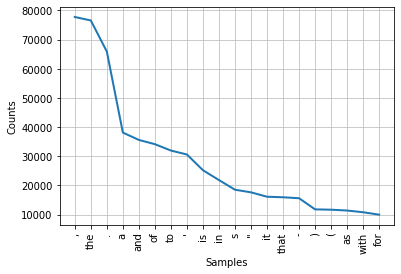

In [82]:
import matplotlib.pyplot as plt
total_freq_word.plot(20,cumulative=False)
plt.show()

In [83]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [84]:
documents = []
 
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
       # documents.append((list(movie_reviews.words(fileid)), category))
        documents.append((movie_reviews.words(fileid), category))
 
print (len(documents)) # Output: 2000
 
#x = [str(item) for item in documents[0][0]]
#print (x)
 
# print first tuple
print (documents[0])

 
# shuffle the document list
from random import shuffle 
shuffle(documents)

2000
(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg')


In [85]:
all_words = [word.lower() for word in movie_reviews.words()]
 
# print first 10 words
print (all_words[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


In [86]:
from nltk import FreqDist 
all_words_frequency = FreqDist(all_words) 
print (all_words_frequency)

<FreqDist with 39768 samples and 1583820 outcomes>


In [87]:
# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [88]:
from nltk.corpus import stopwords
 
stopwords_english = stopwords.words('english')
print (stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [89]:
all_words_without_stopwords = [word for word in all_words if word not in stopwords_english]
 
# print the first 10 words
print (all_words_without_stopwords[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'church', 'party', ',', 'drink']


In [90]:
all_words_without_stopwords = []
for word in all_words:
    if word not in stopwords_english:
        all_words_without_stopwords.append(word)
 
print (all_words_without_stopwords[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'church', 'party', ',', 'drink']


In [91]:
import string 
print (string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [92]:
# create a new list of words by removing punctuation from all_words
all_words_without_punctuation = [word for word in all_words if word not in string.punctuation]

In [93]:
# print the first 10 words
print (all_words_without_punctuation[:10])

['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink']


In [94]:
# Let's name the new list as all_words_clean 
# because we clean stopwords and punctuations from the word list
 
all_words_clean = []
for word in all_words:
    if word not in stopwords_english and word not in string.punctuation:
        all_words_clean.append(word)
 
print (all_words_clean[:10])

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get']


In [95]:
all_words_frequency = FreqDist(all_words_clean)
 
print (all_words_frequency)

<FreqDist with 39586 samples and 710578 outcomes>


In [96]:
# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]


In [97]:
print (len(all_words_frequency)) # Output: 39586
 
# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)
print (most_common_words[:10])

39586
[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]


In [98]:
print (most_common_words[1990:])

[('remain', 64), ('anna', 64), ('moved', 64), ('asking', 64), ('genuinely', 64), ('rain', 64), ('path', 64), ('aware', 64), ('causes', 64), ('international', 64)]


In [99]:
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story', 'would', 'much']


In [100]:
def document_features(document):
    # "set" function will remove repeated/duplicate tokens in the given list
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features
 
# get the first negative movie review file
movie_review_file = movie_reviews.fileids('neg')[0] 
print (movie_review_file)

neg/cv000_29416.txt


In [101]:
print (document_features(movie_reviews.words(movie_review_file)))

{'contains(film)': True, 'contains(one)': True, 'contains(movie)': True, 'contains(like)': True, 'contains(even)': True, 'contains(good)': True, 'contains(time)': False, 'contains(story)': False, 'contains(would)': True, 'contains(much)': False, 'contains(character)': True, 'contains(also)': True, 'contains(get)': True, 'contains(two)': True, 'contains(well)': True, 'contains(characters)': True, 'contains(first)': False, 'contains(--)': False, 'contains(see)': True, 'contains(way)': True, 'contains(make)': True, 'contains(life)': True, 'contains(really)': True, 'contains(films)': True, 'contains(plot)': True, 'contains(little)': True, 'contains(people)': True, 'contains(could)': False, 'contains(scene)': False, 'contains(man)': False, 'contains(bad)': True, 'contains(never)': False, 'contains(best)': False, 'contains(new)': True, 'contains(scenes)': True, 'contains(many)': False, 'contains(director)': True, 'contains(know)': True, 'contains(movies)': True, 'contains(action)': False, 'c

In [102]:
print (documents[0])

(['in', '1970s', ',', 'many', 'european', ...], 'neg')


In [103]:
feature_set = [(document_features(doc), category) for (doc, category) in documents]
print (feature_set[0])

({'contains(film)': True, 'contains(one)': True, 'contains(movie)': False, 'contains(like)': True, 'contains(even)': True, 'contains(good)': False, 'contains(time)': True, 'contains(story)': True, 'contains(would)': True, 'contains(much)': False, 'contains(character)': False, 'contains(also)': False, 'contains(get)': False, 'contains(two)': False, 'contains(well)': False, 'contains(characters)': True, 'contains(first)': True, 'contains(--)': False, 'contains(see)': False, 'contains(way)': True, 'contains(make)': False, 'contains(life)': False, 'contains(really)': False, 'contains(films)': True, 'contains(plot)': False, 'contains(little)': False, 'contains(people)': False, 'contains(could)': True, 'contains(scene)': False, 'contains(man)': False, 'contains(bad)': False, 'contains(never)': False, 'contains(best)': False, 'contains(new)': False, 'contains(scenes)': True, 'contains(many)': True, 'contains(director)': True, 'contains(know)': True, 'contains(movies)': False, 'contains(action

In [104]:
feature_set = []
for (doc, category) in documents:
    feature_set.append((document_features(doc), category))
print (feature_set[0])

({'contains(film)': True, 'contains(one)': True, 'contains(movie)': False, 'contains(like)': True, 'contains(even)': True, 'contains(good)': False, 'contains(time)': True, 'contains(story)': True, 'contains(would)': True, 'contains(much)': False, 'contains(character)': False, 'contains(also)': False, 'contains(get)': False, 'contains(two)': False, 'contains(well)': False, 'contains(characters)': True, 'contains(first)': True, 'contains(--)': False, 'contains(see)': False, 'contains(way)': True, 'contains(make)': False, 'contains(life)': False, 'contains(really)': False, 'contains(films)': True, 'contains(plot)': False, 'contains(little)': False, 'contains(people)': False, 'contains(could)': True, 'contains(scene)': False, 'contains(man)': False, 'contains(bad)': False, 'contains(never)': False, 'contains(best)': False, 'contains(new)': False, 'contains(scenes)': True, 'contains(many)': True, 'contains(director)': True, 'contains(know)': True, 'contains(movies)': False, 'contains(action

In [105]:
print (len(feature_set)) 

2000


In [106]:
test_set = feature_set[:400]
train_set = feature_set[400:]

In [107]:
print (len(train_set))
print (len(test_set))

1600
400


In [108]:
from nltk import NaiveBayesClassifier 
classifier = NaiveBayesClassifier.train(train_set)

In [109]:
from nltk import classify 
accuracy = classify.accuracy(classifier, test_set)
print (accuracy)

0.7825


In [110]:
from nltk.tokenize import word_tokenize
 
custom_review = "I hated the film. It was a disaster. Poor direction, bad acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = document_features(custom_review_tokens)
print (classifier.classify(custom_review_set))
# Negative review correctly classified as negative

neg


In [111]:
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: neg
print (prob_result.prob("neg")) # Output: 0.999989264571
print (prob_result.prob("pos")) # Output: 1.07354285262e-05

<ProbDist with 2 samples>
neg
0.9999996765741898
3.2342582712663067e-07


In [112]:
 
custom_review = "It was a wonderful and amazing movie. I loved it. Best direction, good acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = document_features(custom_review_tokens)
 
print (classifier.classify(custom_review_set)) # Output: neg
# Positive review is classified as negative
# We need to improve our feature set for more accurate prediction


neg


In [113]:
 
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: neg
print (prob_result.prob("neg")) # Output: 0.999791868552
print (prob_result.prob("pos")) # Output: 0.000208131447797

<ProbDist with 2 samples>
neg
0.9999948052093522
5.194790633224319e-06


In [114]:
print (classifier.show_most_informative_features(10))

Most Informative Features
         contains(damon) = True              pos : neg    =     10.8 : 1.0
   contains(outstanding) = True              pos : neg    =      9.9 : 1.0
   contains(wonderfully) = True              pos : neg    =      9.6 : 1.0
        contains(seagal) = True              neg : pos    =      7.6 : 1.0
        contains(poorly) = True              neg : pos    =      5.8 : 1.0
         contains(flynt) = True              pos : neg    =      5.8 : 1.0
         contains(mulan) = True              pos : neg    =      5.8 : 1.0
         contains(awful) = True              neg : pos    =      5.7 : 1.0
        contains(wasted) = True              neg : pos    =      5.1 : 1.0
          contains(lame) = True              neg : pos    =      5.1 : 1.0
None


In [115]:
from nltk.corpus import movie_reviews 
 
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append(words)
 
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append(words)
 

In [116]:
# print first positive review item from the pos_reviews list
print (pos_reviews[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]


In [117]:
# print first negative review item from the neg_reviews list
print (neg_reviews[0])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [118]:
# print first 20 items of the first item of positive review
print (pos_reviews[0][:20])

['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', 'they', "'", 're', 'about', 'superheroes', '(', 'batman', ',']


In [119]:
# print first 20 items of the first item of negative review
print (neg_reviews[0][:20])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


In [120]:
from nltk.corpus import stopwords 
import string 
 
stopwords_english = stopwords.words('english')
 
# feature extractor function
def bag_of_words(words):
    words_clean = []
 
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            words_clean.append(word)
    
    words_dictionary = dict([word, True] for word in words_clean)
    
    return words_dictionary
 
# using dict will remove duplicate words from the words list
# note the output: stopword 'the' is also removed
print (bag_of_words(['the', 'the', 'good', 'bad', 'the', 'good']))

{'good': True, 'bad': True}


In [121]:
# positive reviews feature set
pos_reviews_set = []
for words in pos_reviews:
    pos_reviews_set.append((bag_of_words(words), 'pos'))
 
# negative reviews feature set
neg_reviews_set = []
for words in neg_reviews:
    neg_reviews_set.append((bag_of_words(words), 'neg'))
 
# print first positive review item from the pos_reviews list
print (pos_reviews_set[0])

({'films': True, 'adapted': True, 'comic': True, 'books': True, 'plenty': True, 'success': True, 'whether': True, 'superheroes': True, 'batman': True, 'superman': True, 'spawn': True, 'geared': True, 'toward': True, 'kids': True, 'casper': True, 'arthouse': True, 'crowd': True, 'ghost': True, 'world': True, 'never': True, 'really': True, 'book': True, 'like': True, 'hell': True, 'starters': True, 'created': True, 'alan': True, 'moore': True, 'eddie': True, 'campbell': True, 'brought': True, 'medium': True, 'whole': True, 'new': True, 'level': True, 'mid': True, '80s': True, '12': True, 'part': True, 'series': True, 'called': True, 'watchmen': True, 'say': True, 'thoroughly': True, 'researched': True, 'subject': True, 'jack': True, 'ripper': True, 'would': True, 'saying': True, 'michael': True, 'jackson': True, 'starting': True, 'look': True, 'little': True, 'odd': True, 'graphic': True, 'novel': True, '500': True, 'pages': True, 'long': True, 'includes': True, 'nearly': True, '30': Tru

In [122]:
print (neg_reviews_set[0])

({'plot': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'church': True, 'party': True, 'drink': True, 'drive': True, 'get': True, 'accident': True, 'one': True, 'guys': True, 'dies': True, 'girlfriend': True, 'continues': True, 'see': True, 'life': True, 'nightmares': True, 'deal': True, 'watch': True, 'movie': True, 'sorta': True, 'find': True, 'critique': True, 'mind': True, 'fuck': True, 'generation': True, 'touches': True, 'cool': True, 'idea': True, 'presents': True, 'bad': True, 'package': True, 'makes': True, 'review': True, 'even': True, 'harder': True, 'write': True, 'since': True, 'generally': True, 'applaud': True, 'films': True, 'attempt': True, 'break': True, 'mold': True, 'mess': True, 'head': True, 'lost': True, 'highway': True, 'memento': True, 'good': True, 'ways': True, 'making': True, 'types': True, 'folks': True, 'snag': True, 'correctly': True, 'seem': True, 'taken': True, 'pretty': True, 'neat': True, 'concept': True, 'executed': True, 'terribly': 

In [123]:
print (len(pos_reviews_set), len(neg_reviews_set)) # Output: (1000, 1000)
 
# radomize pos_reviews_set and neg_reviews_set
# doing so will output different accuracy result everytime we run the program
from random import shuffle 
shuffle(pos_reviews_set)
shuffle(neg_reviews_set)
 
test_set = pos_reviews_set[:200] + neg_reviews_set[:200]
train_set = pos_reviews_set[200:] + neg_reviews_set[200:]
 
print(len(test_set),  len(train_set)) # Output: (400, 1600)

1000 1000
400 1600


In [124]:
from nltk import classify
from nltk import NaiveBayesClassifier
 
classifier = NaiveBayesClassifier.train(train_set)
 
accuracy = classify.accuracy(classifier, test_set)
print(accuracy) # Output: 0.7325
 
print (classifier.show_most_informative_features(10))

0.71
Most Informative Features
               insulting = True              neg : pos    =     15.7 : 1.0
               ludicrous = True              neg : pos    =     12.6 : 1.0
              schumacher = True              neg : pos    =     12.3 : 1.0
            effortlessly = True              pos : neg    =     11.7 : 1.0
                  regard = True              pos : neg    =     11.0 : 1.0
                  avoids = True              pos : neg    =     10.3 : 1.0
                seamless = True              pos : neg    =      9.7 : 1.0
                  castle = True              pos : neg    =      9.7 : 1.0
             fascination = True              pos : neg    =      9.7 : 1.0
              astounding = True              pos : neg    =      9.7 : 1.0
None


In [125]:
from nltk.tokenize import word_tokenize
 
custom_review = "I hated the film. It was a disaster. Poor direction, bad acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_words(custom_review_tokens)
print (classifier.classify(custom_review_set)) # Output: neg
# Negative review correctly classified as negative

neg


In [126]:
 
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: neg
print (prob_result.prob("neg")) # Output: 0.776128854994
print (prob_result.prob("pos")) # Output: 0.223871145006


<ProbDist with 2 samples>
neg
0.8343769186633266
0.1656230813366739


In [127]:
 
custom_review = "It was a wonderful and amazing movie. I loved it. Best direction, good acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_words(custom_review_tokens)
 
print (classifier.classify(custom_review_set)) # Output: pos


pos


In [128]:
# Positive review correctly classified as positive
 
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: pos
print (prob_result.prob("neg")) # Output: 0.0972171562901
print (prob_result.prob("pos")) # Output: 0.90278284371

<ProbDist with 2 samples>
pos
0.0535777480733353
0.946422251926664


In [129]:
from nltk import ngrams
from nltk.corpus import stopwords 
import string
 
stopwords_english = stopwords.words('english')
 
# clean words, i.e. remove stopwords and punctuation
def clean_words(words, stopwords_english):
    words_clean = []
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            words_clean.append(word)    
    return words_clean 
 
# feature extractor function for unigram
def bag_of_words(words):    
    words_dictionary = dict([word, True] for word in words)    
    return words_dictionary
 
# feature extractor function for ngrams (bigram)
def bag_of_ngrams(words, n=2):
    words_ng = []
    for item in iter(ngrams(words, n)):
        words_ng.append(item)
    words_dictionary = dict([word, True] for word in words_ng)    
    return words_dictionary

In [130]:
    
from nltk.tokenize import word_tokenize
text = "It was a very good movie."
words = word_tokenize(text.lower())
 
print (words)

['it', 'was', 'a', 'very', 'good', 'movie', '.']


In [131]:
print (bag_of_ngrams(words))

{('it', 'was'): True, ('was', 'a'): True, ('a', 'very'): True, ('very', 'good'): True, ('good', 'movie'): True, ('movie', '.'): True}


In [132]:

# working with cleaning words
# i.e. removing stopwords and punctuation
words_clean = clean_words(words, stopwords_english)
print (words_clean)

['good', 'movie']


In [133]:
 
# cleaning words is find for unigrams
# but this can omit important words for bigrams
# for example, stopwords like very, over, under, so, etc. are important for bigrams
# we create a new stopwords list specifically for bigrams by omitting such important words
important_words = ['above', 'below', 'off', 'over', 'under', 'more', 'most', 'such', 'no', 'nor', 'not', 'only', 'so', 'than', 'too', 'very', 'just', 'but']
 
stopwords_english_for_bigrams = set(stopwords_english) - set(important_words)
 
words_clean_for_bigrams = clean_words(words, stopwords_english_for_bigrams)
print (words_clean_for_bigrams)

['very', 'good', 'movie']


In [134]:
unigram_features = bag_of_words(words_clean)
print (unigram_features)

{'good': True, 'movie': True}


In [135]:
 
bigram_features = bag_of_ngrams(words_clean_for_bigrams)
print (bigram_features)

{('very', 'good'): True, ('good', 'movie'): True}


In [136]:
all_features = unigram_features.copy()
all_features.update(bigram_features)
print (all_features)

{'good': True, 'movie': True, ('very', 'good'): True, ('good', 'movie'): True}


In [137]:
 
# let's define a new function that extracts all features
# i.e. that extracts both unigram and bigrams features
def bag_of_all_words(words, n=2):
    words_clean = clean_words(words, stopwords_english)
    words_clean_for_bigrams = clean_words(words, stopwords_english_for_bigrams)
 
    unigram_features = bag_of_words(words_clean)
    bigram_features = bag_of_ngrams(words_clean_for_bigrams)
 
    all_features = unigram_features.copy()
    all_features.update(bigram_features)
 
    return all_features
 
print (bag_of_all_words(words))

{'good': True, 'movie': True, ('very', 'good'): True, ('good', 'movie'): True}


In [138]:
from nltk.corpus import movie_reviews 
 
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append(words)
 
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append(words)

In [139]:
# positive reviews feature set
pos_reviews_set = []
for words in pos_reviews:
    pos_reviews_set.append((bag_of_all_words(words), 'pos'))
 
# negative reviews feature set
neg_reviews_set = []
for words in neg_reviews:
    neg_reviews_set.append((bag_of_all_words(words), 'neg'))

In [140]:
print (len(pos_reviews_set), len(neg_reviews_set)) # Output: (1000, 1000)
 
# radomize pos_reviews_set and neg_reviews_set
# doing so will output different accuracy result everytime we run the program
from random import shuffle 
shuffle(pos_reviews_set)
shuffle(neg_reviews_set)
 
test_set = pos_reviews_set[:200] + neg_reviews_set[:200]
train_set = pos_reviews_set[200:] + neg_reviews_set[200:]
 
print(len(test_set),  len(train_set)) # Output: (400, 1600)

1000 1000
400 1600


In [141]:
from nltk import classify
from nltk import NaiveBayesClassifier
 
classifier = NaiveBayesClassifier.train(train_set)
 
accuracy = classify.accuracy(classifier, test_set)
print(accuracy) # Output: 0.8025
 
print (classifier.show_most_informative_features(10)) 

0.7625
Most Informative Features
                   anger = True              pos : neg    =     19.7 : 1.0
        ('one', 'worst') = True              neg : pos    =     19.0 : 1.0
             outstanding = True              pos : neg    =     15.9 : 1.0
     ('saving', 'grace') = True              neg : pos    =     12.3 : 1.0
       ('quite', 'well') = True              pos : neg    =     11.7 : 1.0
        ('not', 'funny') = True              neg : pos    =     11.4 : 1.0
                    slip = True              pos : neg    =     11.0 : 1.0
                  regard = True              pos : neg    =     11.0 : 1.0
       ('bad', 'movies') = True              neg : pos    =     11.0 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
None


In [142]:
from nltk.tokenize import word_tokenize
 
custom_review = "I hated the film. It was a disaster. Poor direction, bad acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_all_words(custom_review_tokens)
print (classifier.classify(custom_review_set)) # Output: neg
# Negative review correctly classified as negative


neg


In [143]:
 
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: neg
print (prob_result.prob("neg")) # Output: 0.770612685688
print (prob_result.prob("pos")) # Output: 0.229387314312


<ProbDist with 2 samples>
neg
0.9744276603647843
0.0255723396352132


In [144]:
 
 
custom_review = "It was a wonderful and amazing movie. I loved it. Best direction, good acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_all_words(custom_review_tokens)
 
print (classifier.classify(custom_review_set)) # Output: pos
# Positive review correctly classified as positive


pos


# Airplane rivews

In [145]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [147]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [148]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


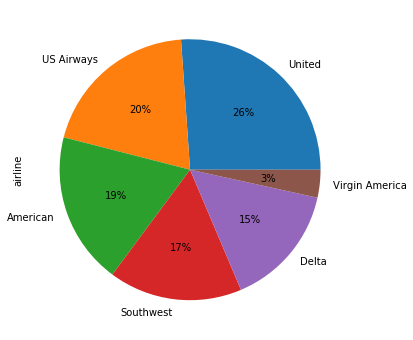

In [149]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

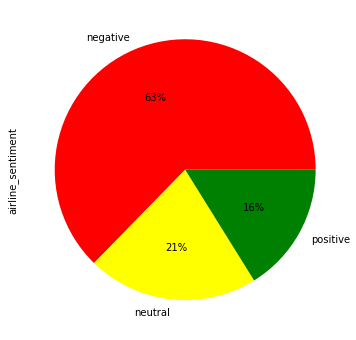

In [150]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

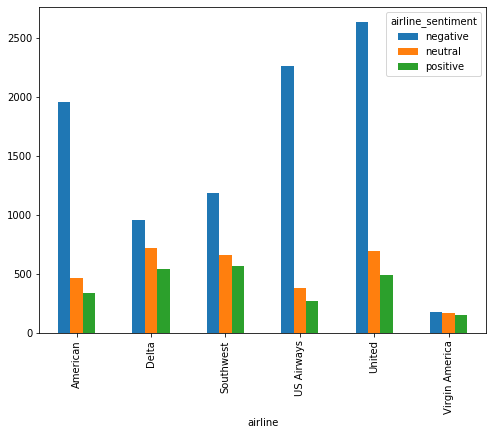

In [151]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

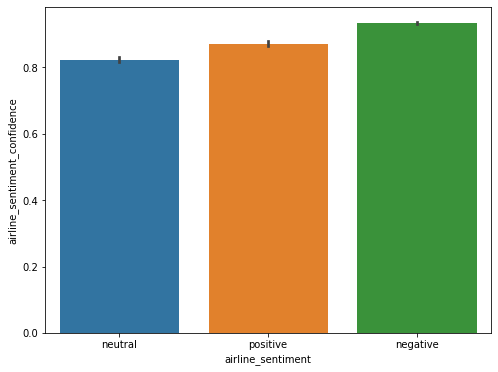

In [152]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [153]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB
